<a href="https://colab.research.google.com/github/Minhaz78/Machine-Learning-Practice/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/dataset/Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


## Shape 

In [ ]:
df.shape

(400, 5)

## Null value check

In [ ]:
df.isnull().values.any()

False

In [ ]:
count_NaN = df.isnull().sum()
print ('Count of NaN: ' + str(count_NaN))

Count of NaN: User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


## Lebel Separation

In [ ]:
x, y = df.iloc[:, :-1], df.iloc[:, [-1]]

In [ ]:
x

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [ ]:
y


,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


# Train and Test Data Split With Sklearn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [ ]:
X_train

,User ID,Gender,Age,EstimatedSalary
24,15705113,Male,46,23000
33,15776733,Female,28,44000
396,15706071,Male,51,23000
273,15589449,Male,39,106000
246,15638003,Female,35,50000
...,...,...,...,...
73,15782530,Female,33,113000
118,15642725,Male,40,59000
189,15715160,Male,28,32000
206,15654230,Female,55,130000


In [ ]:
X_test

,User ID,Gender,Age,EstimatedSalary
218,15666675,Female,46,96000
191,15662067,Female,19,26000
117,15591433,Male,36,52000
50,15694395,Female,24,32000
348,15579212,Male,39,77000
...,...,...,...,...
368,15779744,Male,38,71000
89,15682268,Male,35,50000
182,15694288,Female,32,117000
219,15732987,Male,59,143000


## Plotting Data For Better Undarstanding

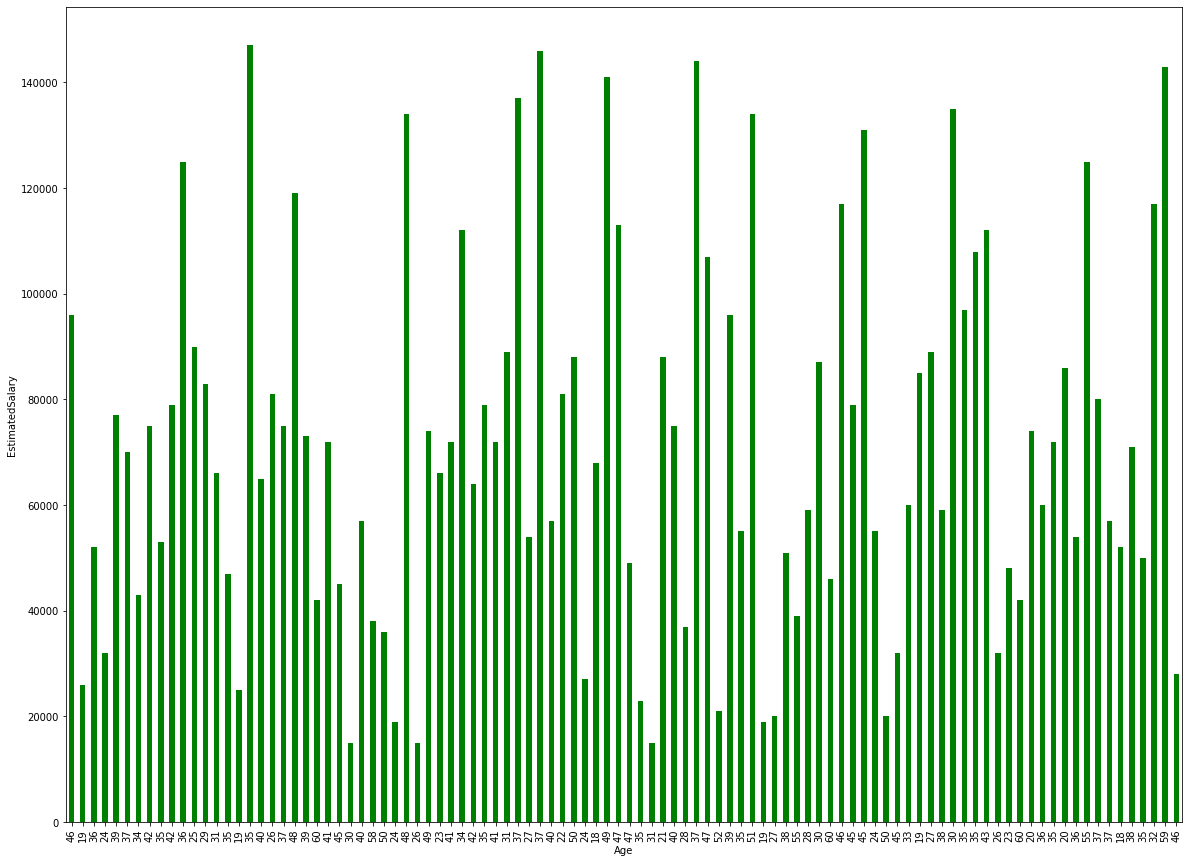

In [ ]:
X_test.set_index('Age')["EstimatedSalary"].plot.bar(
    xlabel='Age',
    ylabel='EstimatedSalary',
    rot=90,
    figsize=(20,15),
    fontsize=10,
    color="green"
    )

# Seaborn

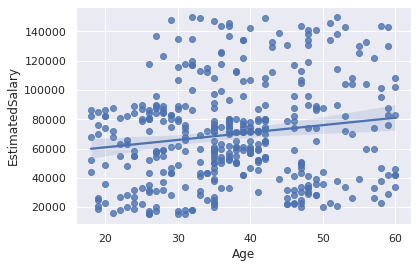

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival probability as a function of age and sex
g = sns.regplot(x="Age", y="EstimatedSalary", data=df)

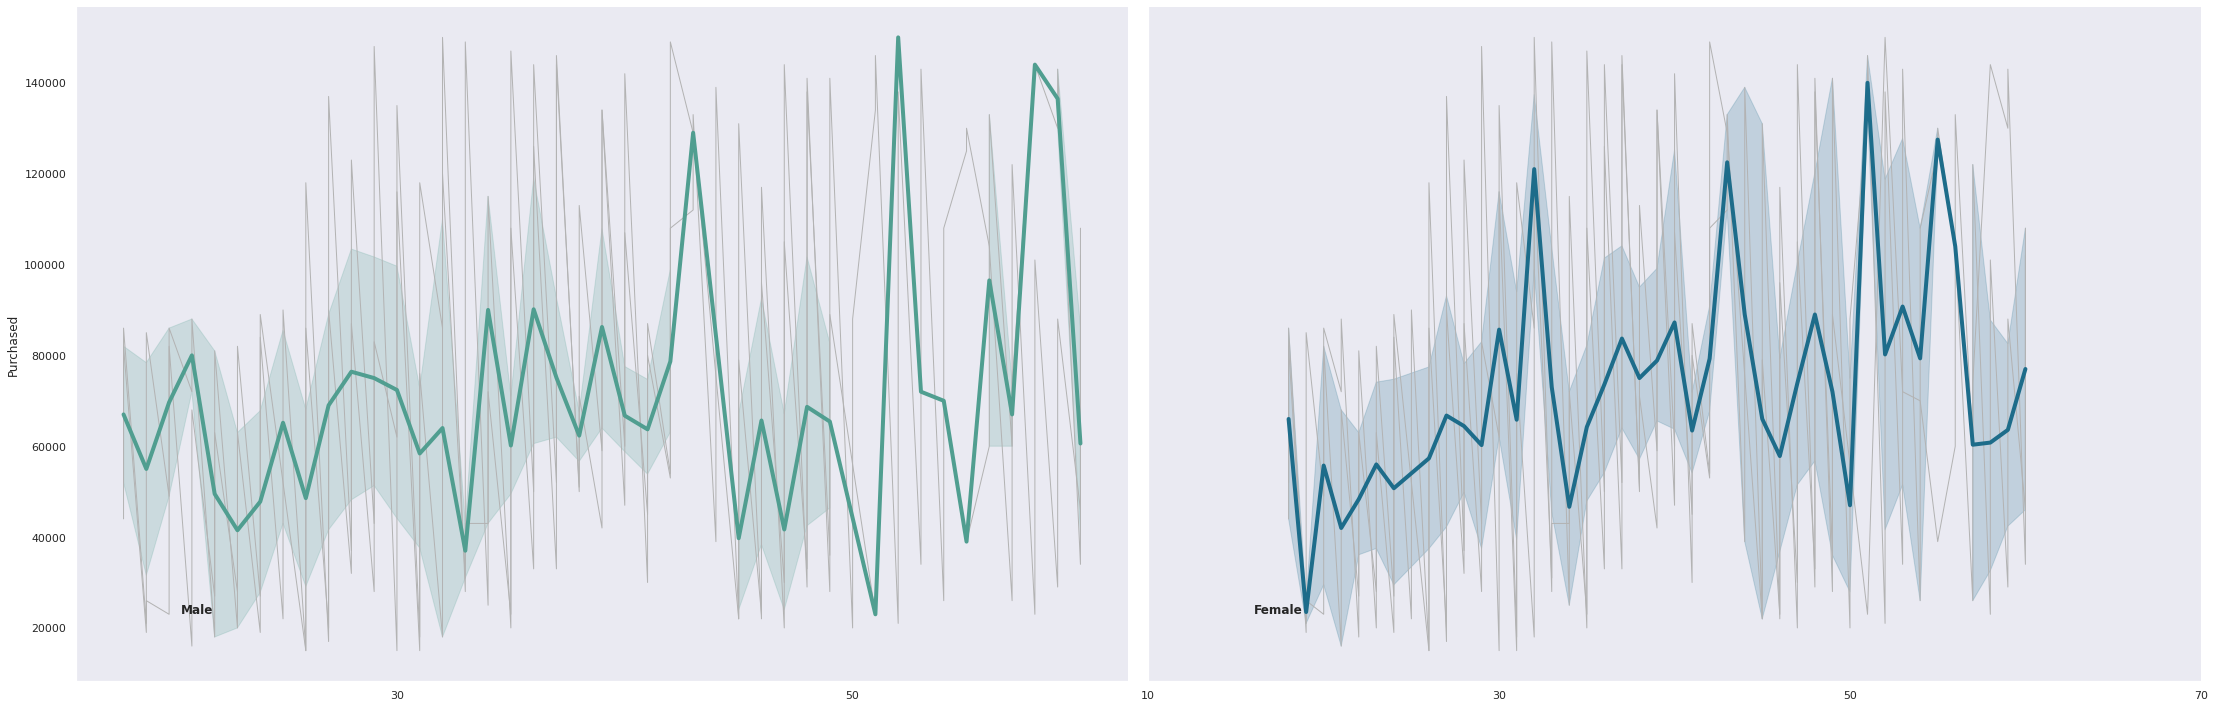

In [ ]:
sns.set_theme(style="dark")
# Plot each year's time series in its own facet
g = sns.relplot(
    data=df,
    x="Age", y="EstimatedSalary", col="Gender", hue="Gender",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=10, height=10, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for Gender, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.100, .100, Gender, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df, x="Age", y="EstimatedSalary", units="Gender",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Purchased")
g.tight_layout()